## Loading Dataset


### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [2]:
dataset = pd.read_csv('C:/Users/kshitij kumar/Downloads/Excel/insurance.csv')
dataset.rename(columns={'expenses':'charges'}, inplace=True)

print(dataset.shape)

dataset.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [25]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [3]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [5]:
dataset['age'].value_counts()

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

In [6]:
dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [7]:
dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [8]:
dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [9]:
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

## Data Analysis

Text(0.5, 1.0, 'Age vs Charges')

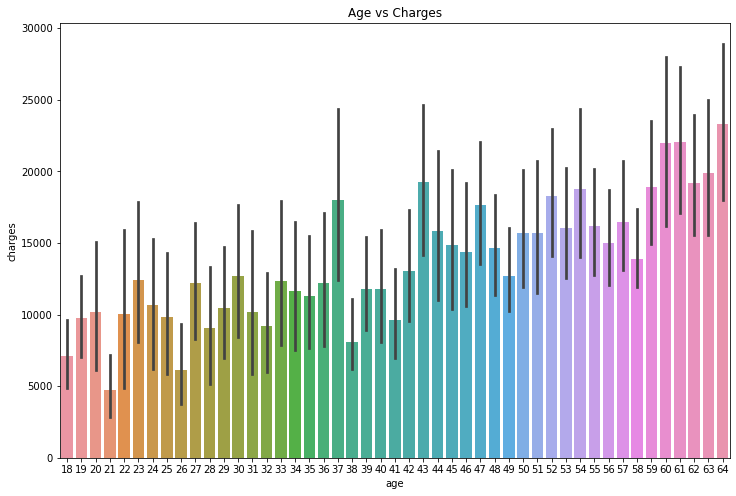

In [33]:
# Age vs Charges
# the more the age the more will be insurance charge (roughly estimated mostly this trend is observed)

plt.figure(figsize = (12, 8))
sns.barplot(x = 'age', y = 'charges', data = dataset)

plt.title("Age vs Charges")

Text(0.5, 1.0, 'sex vs charges')

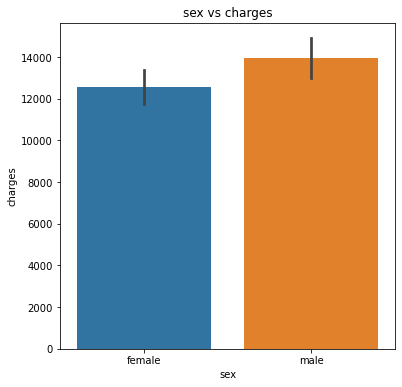

In [34]:
# sex vs charges
# males have slightly greater insurance charges in comparison to females in general

plt.figure(figsize = (6, 6))
sns.barplot(x = 'sex', y = 'charges', data = dataset)

plt.title('sex vs charges')

Text(0.5, 1.0, 'children vs charges')

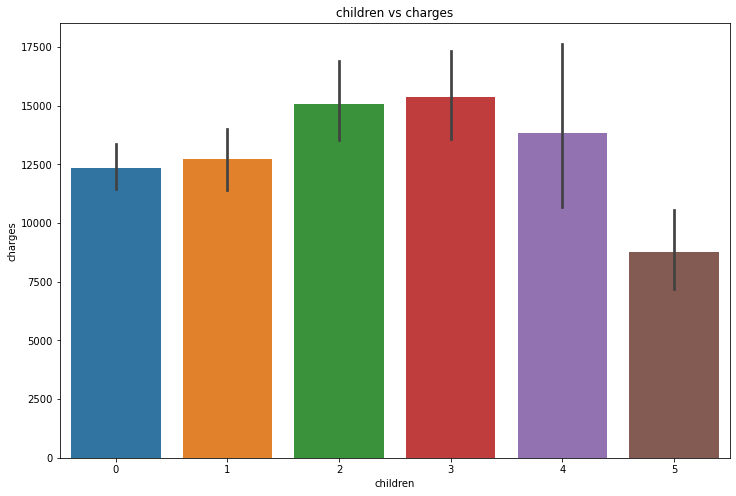

In [36]:
# children vs charges
# no. of childrens of a person has a very interesting dependency on insurance costs

plt.figure(figsize = (12, 8))
sns.barplot(x = 'children', y = 'charges', data = dataset)

plt.title('children vs charges')

Text(0.5, 1.0, 'region vs charges')

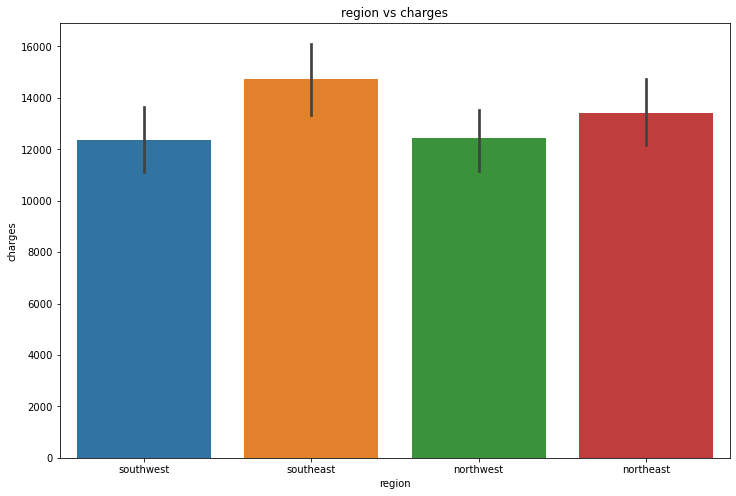

In [38]:
# region vs charges
# From the graph we can see that the region actually does not play any signifaicant role in determining the insurance charges

plt.figure(figsize = (12, 8))
sns.barplot(x = 'region', y = 'charges', data = dataset)

plt.title('region vs charges')
     

Text(0.5, 1.0, 'smoker vs charges')

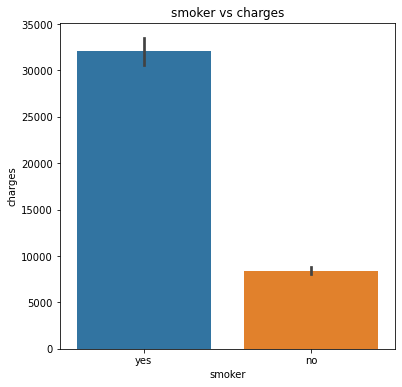

In [39]:
# smoker vs charges
# from the graph below, it is visible that smokers have more insurance charges than the non smokers which is quite understandable

plt.figure(figsize = (6, 6))
sns.barplot(x = 'smoker', y = 'charges', data = dataset)

plt.title('smoker vs charges')
     

### Heatmap for visualisation

C:\Users\kshitij kumar\AppData\Local\Temp\ipykernel_21664\952357342.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool),


<AxesSubplot:>

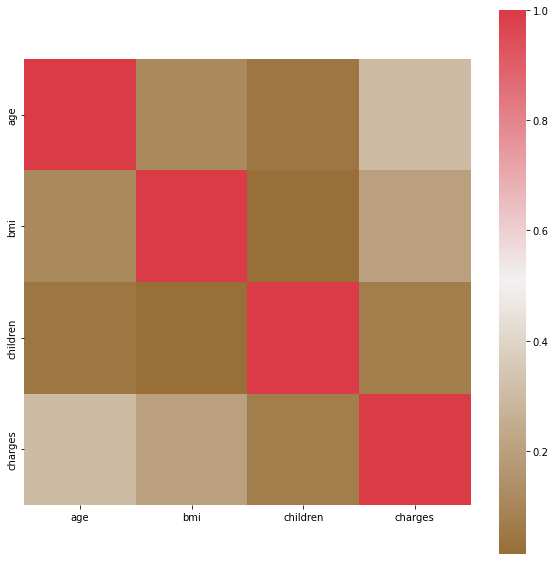

In [40]:
# plotting the correlation plot for the dataset

f, ax = plt.subplots(figsize = (10, 10))

corr = dataset.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool), 
            cmap = sns.diverging_palette(50, 10, as_cmap = True), square = True, ax = ax)

## Data Preprocessing

In [41]:
# removing unnecassary columns from the dataset

dataset = dataset.drop('region', axis = 1)

print(dataset.shape)

dataset.columns

(1338, 6)


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

In [42]:
# label encoding for sex and smoker

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# 0 for females and 1 for males
dataset['sex'] = le.fit_transform(dataset['sex'])

# 0 for smokers and 1 for non smokers
dataset['smoker'] = le.fit_transform(dataset['smoker'])

In [44]:
dataset['sex'].value_counts()

1    676
0    662
Name: sex, dtype: int64

In [46]:
dataset['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [48]:
# splitting the dependent and independent variable

x = dataset.iloc[:,:5]
y = dataset.iloc[:,5]

print(x.shape)
print(y.shape)
     

(1338, 5)
(1338,)


In [50]:
# splitting the dataset into training and testing sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 30)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 5)
(268, 5)
(1070,)
(268,)


In [51]:
# standard scaling

from sklearn.preprocessing import StandardScaler

# creating a standard scaler
sc = StandardScaler()

# feeding independents sets into the standard scaler
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

## Model

### Random Forest

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# creating the model
model = RandomForestRegressor()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# Calculating the r2 score
r2 = r2_score(y_test,y_pred)
print("r2 score :", r2)


MSE : 26200644.28166477
RMSE : 5118.656491860415
r2 score : 0.8301450330802099


## Choosing best hyperparameters

In [61]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = 1)

In [62]:
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=200; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_es

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, verbose=2)

In [65]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 5}

### Evaluation

In [73]:
from sklearn.metrics import mean_squared_error, accuracy_score
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = np.sqrt(mean_squared_error(y_test, predictions))
    print('Model Performance')
    print('MSE of: ', errors)
    
    return errors

In [76]:
# Base accuracy (RandomForestRegressor())  >>
base_accuracy = evaluate(model, x_test, y_test)

# Best model >>
best_model=RandomForestRegressor(n_estimators=700,min_samples_split=15,min_samples_leaf=5
                                ,max_features='auto',max_depth=5)
best_model.fit(x_train , y_train)

best_accuracy = evaluate(best_model, x_test, y_test)

base_r2_score=r2_score(y_test,model.predict(x_test))
best_r2_score=r2_score(y_test,best_model.predict(x_test))
print('base score:',base_r2_score)
print('best score:',best_r2_score)

Model Performance
MSE of:  5118.656491860415
Model Performance
MSE of:  4655.098700408861
